In [83]:
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import h5py
plt.style.use('./graph_preset.mplstyle')

### １．データの読み込み

In [84]:
run_dir = Path("../runs")
read_paths = natsorted(run_dir.glob("*.h5"))

for idx, read_path in enumerate(read_paths, start=0):
    run_name = Path(read_path).name   # e.g. 250526105004.h5
    print(f"{idx}: {run_name}")

0: 251015133858.h5
1: 251015145214.h5
2: 251015145355.h5
3: 251015145440.h5
4: 251015145511.h5
5: 251015145638.h5
6: 251015145824.h5
7: 251015155457.h5
8: 251015160924.h5
9: 251015170304.h5
10: 251015174245.h5
11: 251015183849.h5
12: 251015192850.h5


### ２．データの選択

In [85]:
index = 11

with h5py.File(read_paths[index], "r") as f: # read_paths[#] that you want to read
    print(f"--- Structure of {read_path} ---")

    def print_structure(name, obj):
        # データセットの場合は形状とデータ型も表示
        if isinstance(obj, h5py.Dataset):
            print(f"  {name} (Dataset) | Shape: {obj.shape}, Dtype: {obj.dtype}")
        # グループの場合はグループ名を表示
        elif isinstance(obj, h5py.Group):
            print(f"  {name} (Group)")

    f.visititems(print_structure)
    print("---------------------------------")

--- Structure of ..\runs\251015192850.h5 ---
  current_reduction (Group)
  current_reduction/current_10 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_11 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_12 (Dataset) | Shape: (65000, 4), Dtype: float32
  current_reduction/current_13 (Dataset) | Shape: (65000, 4), Dtype: float32
  current_reduction/current_14 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_15 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_20 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_25 (Dataset) | Shape: (65000, 4), Dtype: float32
  current_reduction/current_30 (Dataset) | Shape: (65000, 4), Dtype: float32
  current_reduction/current_35 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_40 (Dataset) | Shape: (65125, 4), Dtype: float32
  current_reduction/current_45 (Dataset) | Shape: (65000, 4), Dtype: float32
  c

In [89]:
df_data = dict()

def store_dataset(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"  Loading: {name} | Shape: {obj.shape}")
        df = pd.DataFrame(obj[:])
        df_data[name] = df

with h5py.File(read_paths[index], "r") as f:
    print(f"--- Loading all datasets from {read_paths[index]} ---")
    f.visititems(store_dataset)
    print("---------------------------------------------")

print("\n--- Dictionary Keys ---")
print(list(df_data.keys()))
print("-----------------------")

--- Loading all datasets from ..\runs\251015183849.h5 ---
  Loading: current_reduction/current_10 | Shape: (65125, 4)
  Loading: current_reduction/current_11 | Shape: (65125, 4)
  Loading: current_reduction/current_12 | Shape: (65000, 4)
  Loading: current_reduction/current_13 | Shape: (65000, 4)
  Loading: current_reduction/current_14 | Shape: (65125, 4)
  Loading: current_reduction/current_15 | Shape: (65125, 4)
  Loading: current_reduction/current_20 | Shape: (65125, 4)
  Loading: current_reduction/current_25 | Shape: (65000, 4)
  Loading: current_reduction/current_30 | Shape: (65000, 4)
  Loading: current_reduction/current_35 | Shape: (65125, 4)
  Loading: current_reduction/current_40 | Shape: (65125, 4)
  Loading: current_reduction/current_45 | Shape: (65000, 4)
  Loading: current_reduction/current_8 | Shape: (35625, 4)
  Loading: current_reduction/current_9 | Shape: (65125, 4)
  Loading: logs/log | Shape: (23552, 4)
---------------------------------------------

--- Dictionary Ke

In [90]:
df_data["logs/log"]

,0,1,2,3
0,0.124991,0.0,0.000000,0.000001
1,0.249992,0.0,0.000000,0.000001
2,0.374993,0.0,0.000000,0.000001
3,0.499994,0.0,0.000000,0.000001
4,0.624995,0.0,0.000000,0.000001
...,...,...,...,...
23547,2815.521484,1.0,1.003906,0.033868
23548,2815.646484,1.0,1.007812,0.032211
23549,2815.771484,1.0,1.003906,0.032829
23550,2815.896484,1.0,1.003906,0.032314


In [91]:
if 'logs/log' in df_data:
    df_data['logs/log'].columns = ["rel_time", "com", "vel", "Ptot"]

for name in list(df_data.keys())[:-1]:
    if name in df_data:
        df_data[name].columns = ["rel_time", "Iu", "Vu", "Ptot"]

In [92]:
df_data["logs/log"]

,rel_time,com,vel,Ptot
0,0.124991,0.0,0.000000,0.000001
1,0.249992,0.0,0.000000,0.000001
2,0.374993,0.0,0.000000,0.000001
3,0.499994,0.0,0.000000,0.000001
4,0.624995,0.0,0.000000,0.000001
...,...,...,...,...
23547,2815.521484,1.0,1.003906,0.033868
23548,2815.646484,1.0,1.007812,0.032211
23549,2815.771484,1.0,1.003906,0.032829
23550,2815.896484,1.0,1.003906,0.032314


### ３．プロット

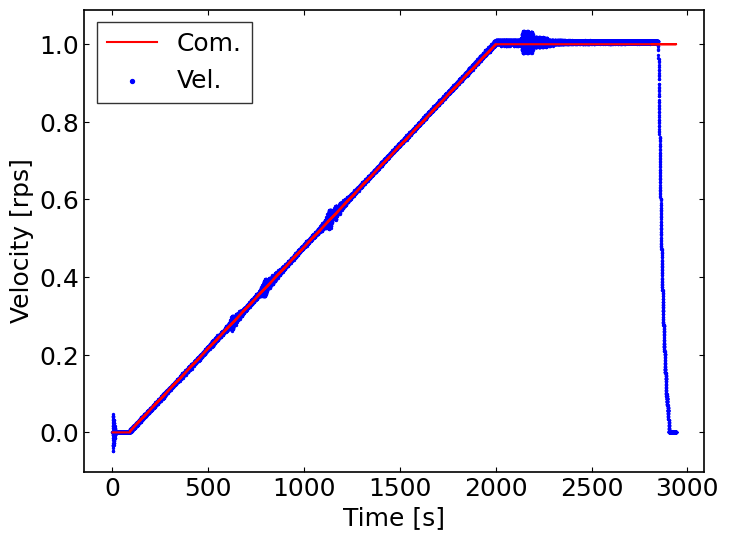

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["com"], label="Com.", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"], label="Vel.", color="blue", s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.legend()

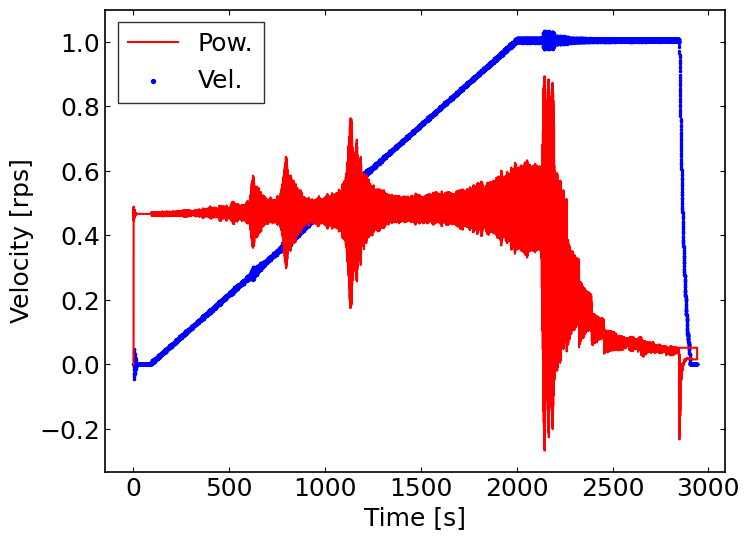

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"], label="Vel.", color="blue", s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.legend()

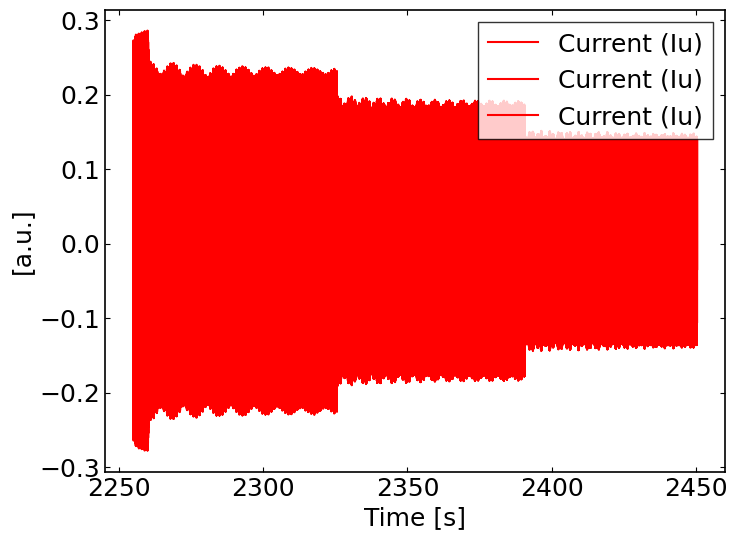

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["current_reduction/current_20"]["rel_time"][:], df_data["current_reduction/current_20"]["Iu"][:], label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_25"]["rel_time"][:], df_data["current_reduction/current_25"]["Iu"][:], label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_xlabel("Time [s]")
ax.set_ylabel("[a.u.]")

ax.legend()

In [100]:
# mkdir
parent_dir = read_paths[index].parent
dir_name = read_paths[index].stem
output_dir = parent_dir / dir_name
output_dir.mkdir(parents=True, exist_ok=True)

In [101]:
# hdf2csv
for name, df in df_data.items():
    base_filename = name.split('/')[-1]
    csv_path = output_dir / (base_filename + ".csv")
    df.to_csv(csv_path, index=False)
    print(f"Data saved to {csv_path}")

Data saved to ..\runs\251015183849\current_10.csv
Data saved to ..\runs\251015183849\current_11.csv
Data saved to ..\runs\251015183849\current_12.csv
Data saved to ..\runs\251015183849\current_13.csv
Data saved to ..\runs\251015183849\current_14.csv
Data saved to ..\runs\251015183849\current_15.csv
Data saved to ..\runs\251015183849\current_20.csv
Data saved to ..\runs\251015183849\current_25.csv
Data saved to ..\runs\251015183849\current_30.csv
Data saved to ..\runs\251015183849\current_35.csv
Data saved to ..\runs\251015183849\current_40.csv
Data saved to ..\runs\251015183849\current_45.csv
Data saved to ..\runs\251015183849\current_8.csv
Data saved to ..\runs\251015183849\current_9.csv
Data saved to ..\runs\251015183849\log.csv
